In [1]:
# import pandas for reading, cleaning, and analyzing data in table form
import pandas as pd

# import seaborn to create easy and visually attractive charts
import seaborn as sns

# import matplotlib for basic plotting and customizing graphs
import matplotlib.pyplot as plt

In [2]:
# load the built-in 'tips' dataset from seaborn
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# read the Titanic training data from a CSV file into a DataFrame
titanic = pd.read_csv('./train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# read the flights data from a CSV file into a DataFrame
flights = pd.read_csv('./flights.csv')

In [7]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [8]:
# load the built-in 'iris' dataset from seaborn
iris = sns.load_dataset('iris')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **1. Scatterplot (Numerical - Numerical)**

### **a. Bivariate**

<Axes: xlabel='total_bill', ylabel='tip'>

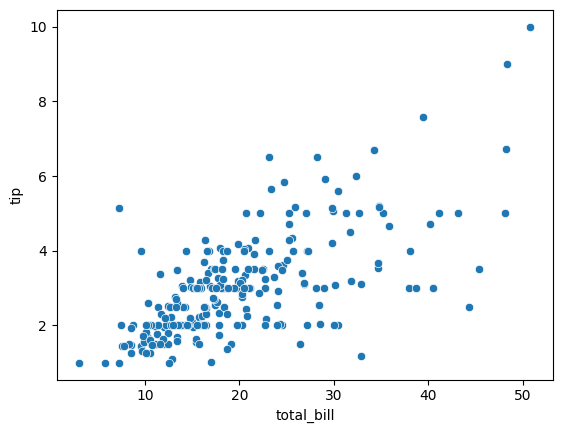

In [10]:
# create a scatter plot showing the relationship between total bill and tip
sns.scatterplot(tips, x="total_bill", y="tip")

### **b. Multivariate**

<Axes: xlabel='total_bill', ylabel='tip'>

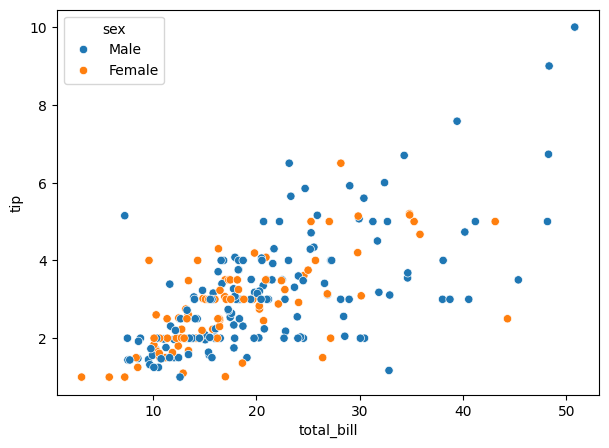

In [11]:
# set the figure size for the plot (7 inches wide, 5 inches tall)
plt.figure(figsize=(7,5))

# create a scatter plot of total bill vs tip
# color the points based on gender (sex)
sns.scatterplot(tips, x="total_bill", y="tip", hue="sex")

<Axes: xlabel='total_bill', ylabel='tip'>

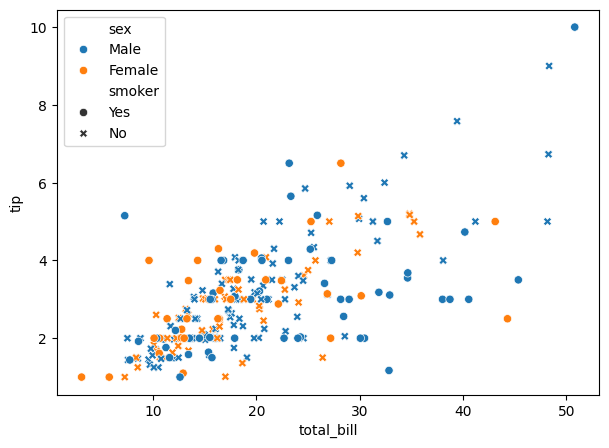

In [12]:
plt.figure(figsize=(7,5))

# create a scatter plot of total bill vs tip
# color points by gender (hue="sex") and change marker style based on smoker status (style="smoker")
sns.scatterplot(tips, x="total_bill", y="tip", hue="sex", style="smoker")

<Axes: xlabel='total_bill', ylabel='tip'>

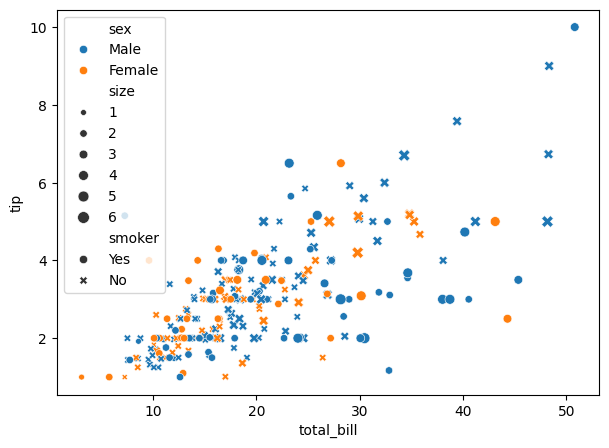

In [13]:
plt.figure(figsize=(7,5))

# create a scatter plot of total bill vs tip
# color by gender (hue="sex"), marker style by smoker status (style="smoker")
# size of points represents the size of the dining party (size="size")
sns.scatterplot(tips, x="total_bill", y="tip", hue="sex", style="smoker", size="size")

## **2. Barplot (Numerical - Categorical)**

### **a. Bivariate**

<Axes: xlabel='Pclass', ylabel='Age'>

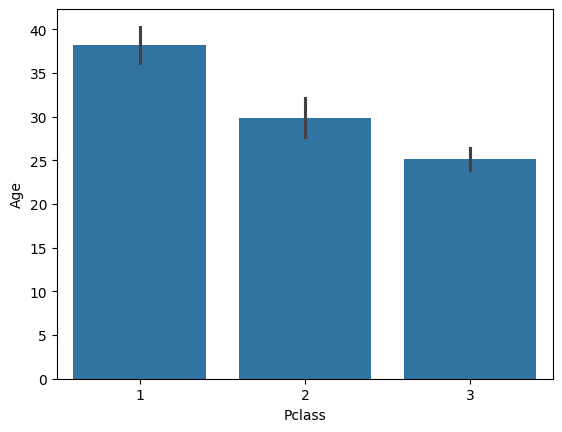

In [14]:
# create a bar plot showing average age for each passenger class (Pclass)
sns.barplot(titanic, x="Pclass", y="Age")

### **b. Multivariate**

<Axes: xlabel='Pclass', ylabel='Fare'>

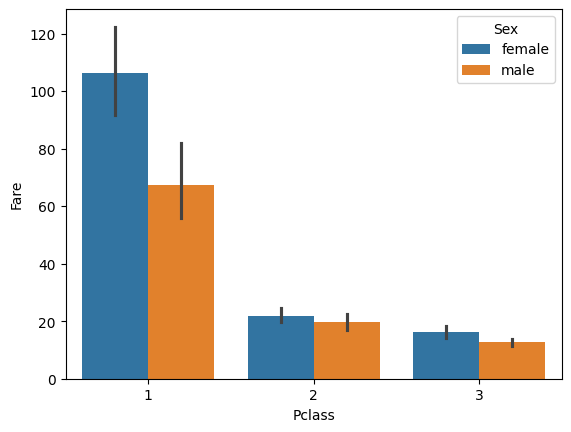

In [15]:
# create a bar plot showing average fare for each passenger class (Pclass)
# separate bars by gender using hue="Sex"
sns.barplot(titanic, x="Pclass", y="Fare", hue="Sex")

## **3. Boxplot (Numerical - Categorical)**

### **a. Bivariate**

<Axes: xlabel='Sex', ylabel='Age'>

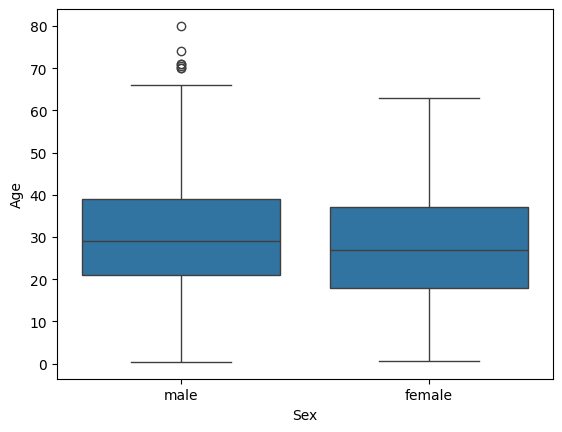

In [16]:
# create a box plot showing the distribution of Age for each gender
sns.boxplot(titanic, x="Sex", y="Age")

### **b. Multivariate**

<Axes: xlabel='Sex', ylabel='Age'>

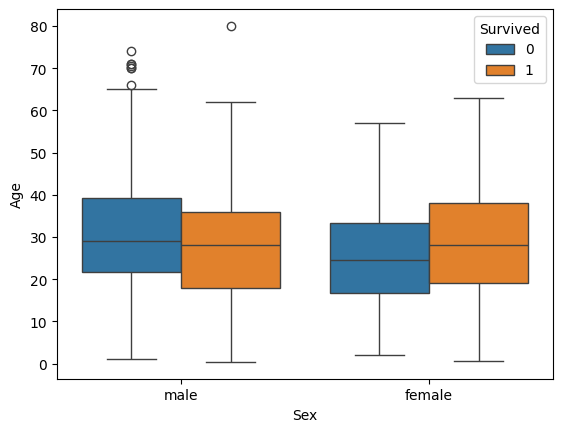

In [17]:
# create a box plot showing Age distribution by gender
# separate boxes based on survival status (Survived)
sns.boxplot(titanic, x="Sex", y="Age", hue="Survived")

## **4. Distplot (Numerical - Categorical)**

<Axes: xlabel='Age', ylabel='Probability'>

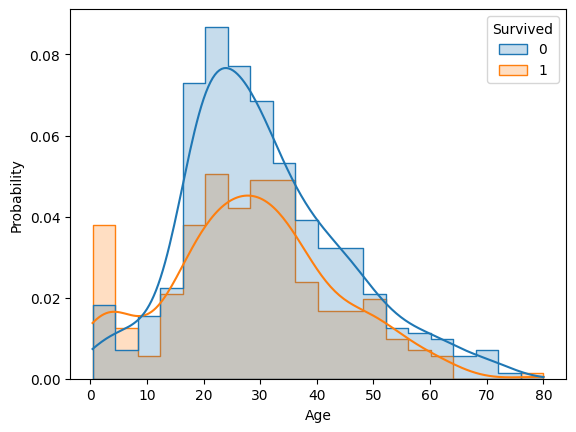

In [18]:
# create a histogram of Age showing probability distribution
# sparate the histogram by survival status (hue="Survived")
# add a smooth density curve (kde=True) and step-style bars
sns.histplot(
    titanic,
    x="Age",
    hue="Survived",
    kde=True,
    stat="probability",
    element="step"
)

## **5. Heatmap (Categorical - Categorical)**

In [19]:
# create a cross-tabulation (frequency table) between Pclass and Survived
pd.crosstab(titanic["Pclass"], titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

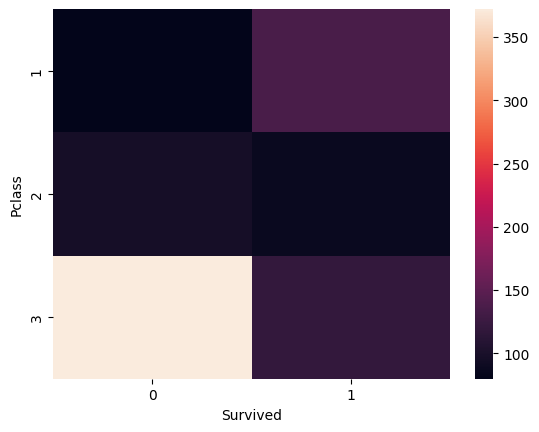

In [20]:
# create a heatmap to visualize the number of passengers for each combination of Pclass and Survived
sns.heatmap(pd.crosstab(titanic["Pclass"], titanic["Survived"]))

In [21]:
# calculate the average survival rate (%) for each passenger class
(titanic.groupby("Pclass")
        .mean(numeric_only=True)["Survived"] * 100)

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


<Axes: xlabel='Pclass'>

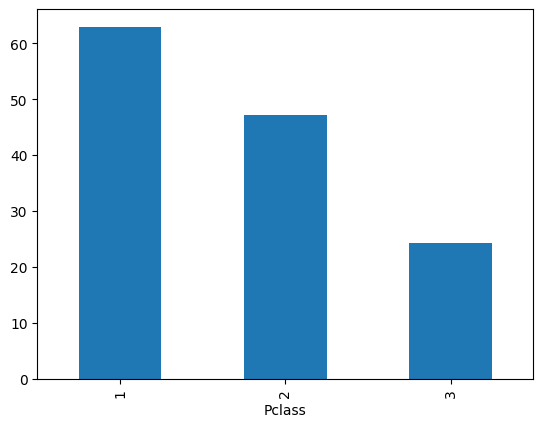

In [22]:
# plot a bar chart showing survival percentage for each passenger class
(titanic.groupby("Pclass")
        .mean(numeric_only=True)["Survived"] * 100).plot(kind="bar")

In [23]:
# calculate the survival percentage for each gender (male/female)
(titanic.groupby("Sex")
        .mean(numeric_only=True)["Survived"] * 100)

,Survived
Sex,
female,74.203822
male,18.890815


In [24]:
# calculate the survival percentage for passengers based on their embarkation port
(titanic.groupby("Embarked")
        .mean(numeric_only=True)["Survived"] * 100)

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


## **6. ClusterMap (Categorical - Categorical)**

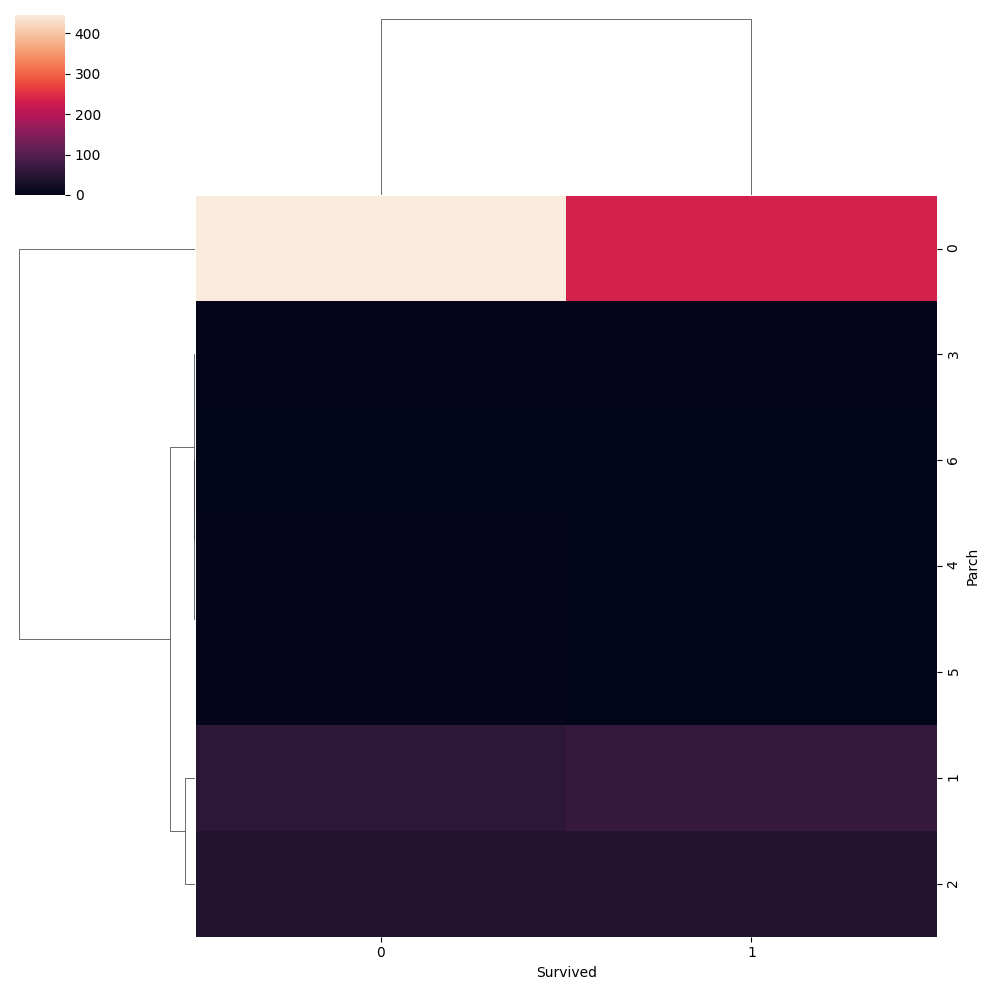

In [25]:
# create a cluster map to visualize survival counts based on number of parents/children aboard (Parch)
sns.clustermap(pd.crosstab(titanic["Parch"], titanic["Survived"]))

In [26]:
# create a pivot table showing number of passengers for each month across different years
flights.pivot_table(
    values="passengers",  # column to summarize
    index="month",        # rows: months
    columns="year",       # columns: years
    observed=False        # include all combinations of month and year
)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
August,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
December,118.0,140.0,166.0,194.0,201.0,229.0,278.0,306.0,336.0,337.0,405.0,432.0
February,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
January,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
July,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
June,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
March,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


<Axes: xlabel='year', ylabel='month'>

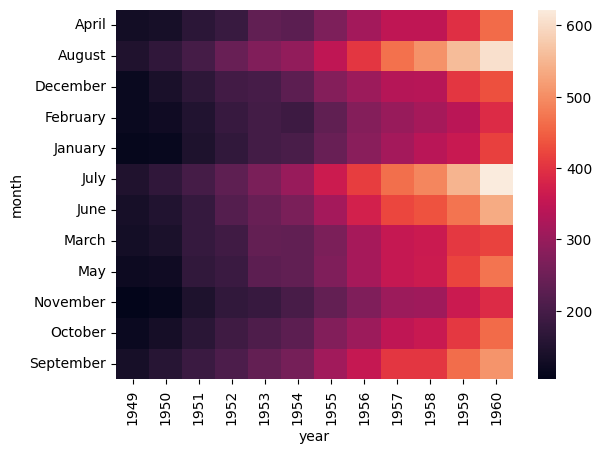

In [27]:
# create a heatmap of monthly passenger numbers across different years
sns.heatmap(
    flights.pivot_table(
        values="passengers",  # number of passengers
        index="month",        # months on y-axis
        columns="year",       # years on x-axis
        observed=False        # include all month-year combinations
    )
)

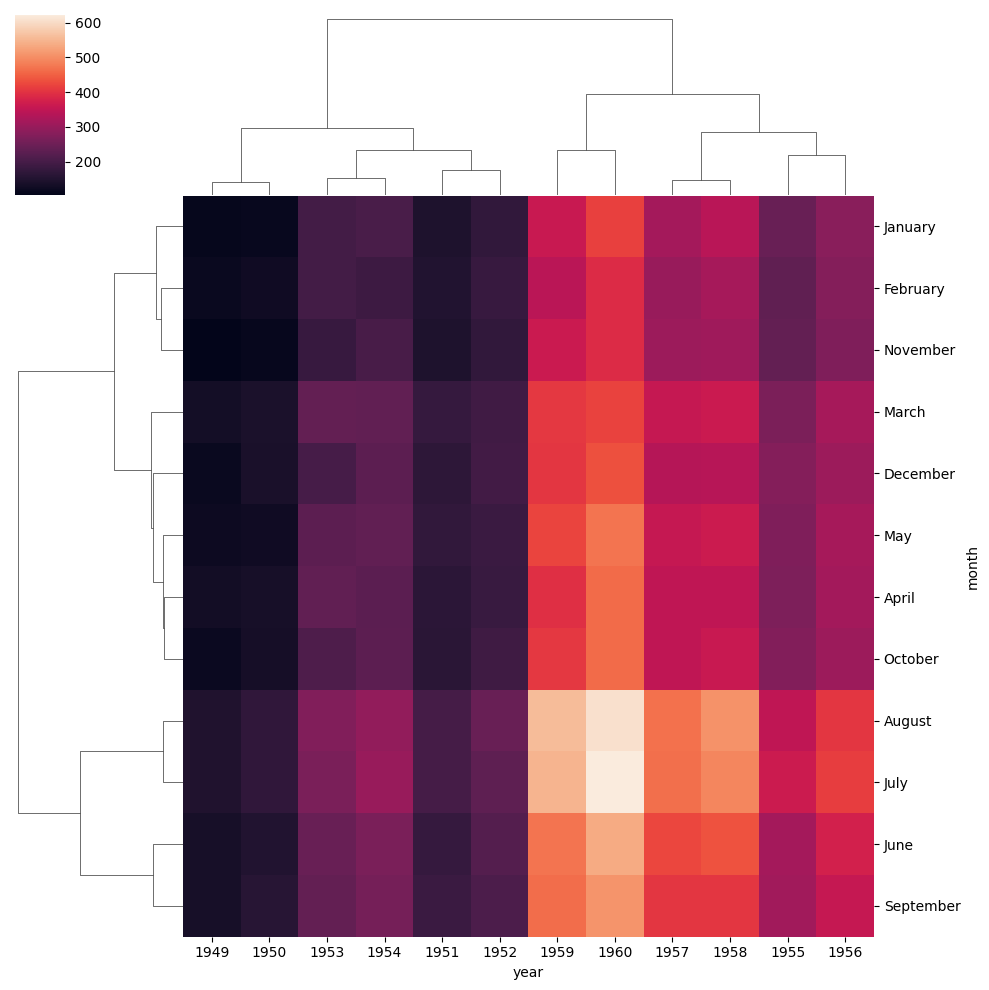

In [28]:
# create a cluster map of monthly passenger numbers across different years
# this clusters months and years based on similarity in passenger counts
sns.clustermap(
    flights.pivot_table(
        values="passengers",  # number of passengers
        index="month",        # months on y-axis
        columns="year",       # years on x-axis
        observed=False        # include all month-year combinations
    )
)

## **7. Pairplot**

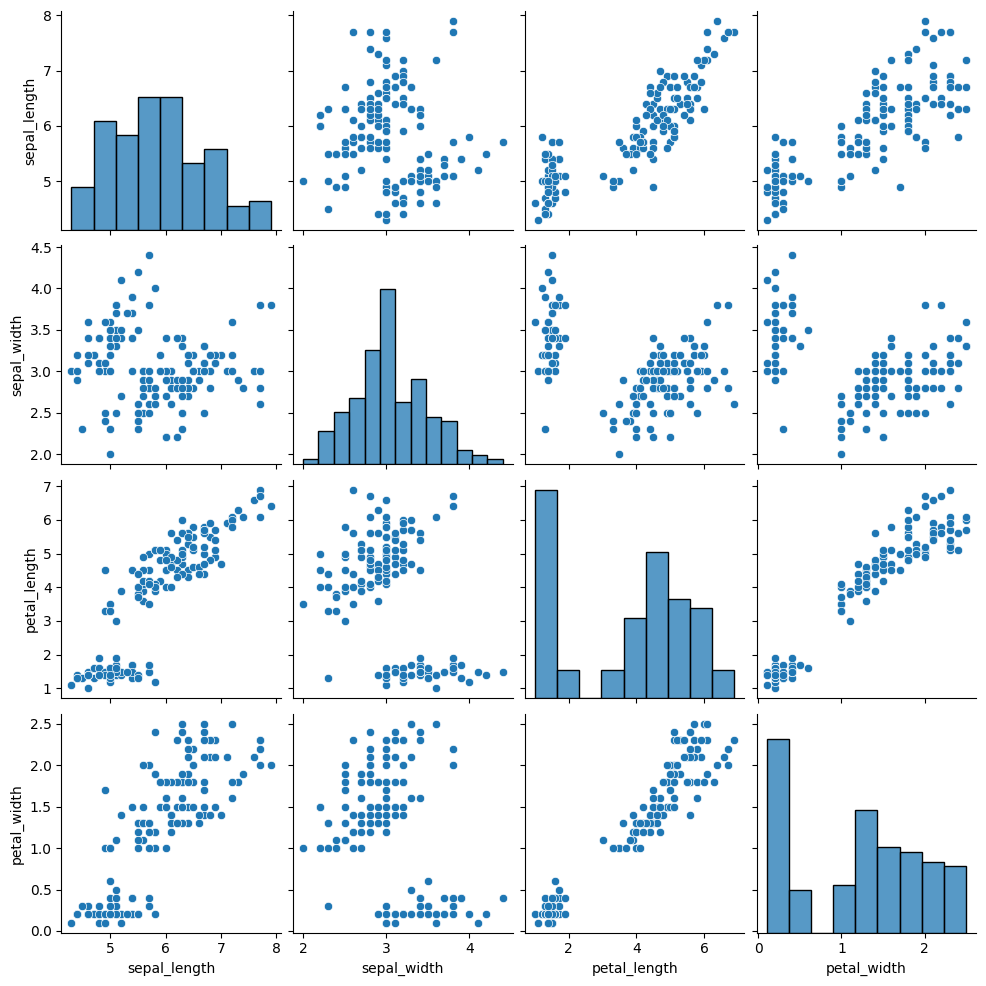

In [29]:
# create a pairplot to visualize relationships between all numerical variables in the iris dataset
sns.pairplot(iris)

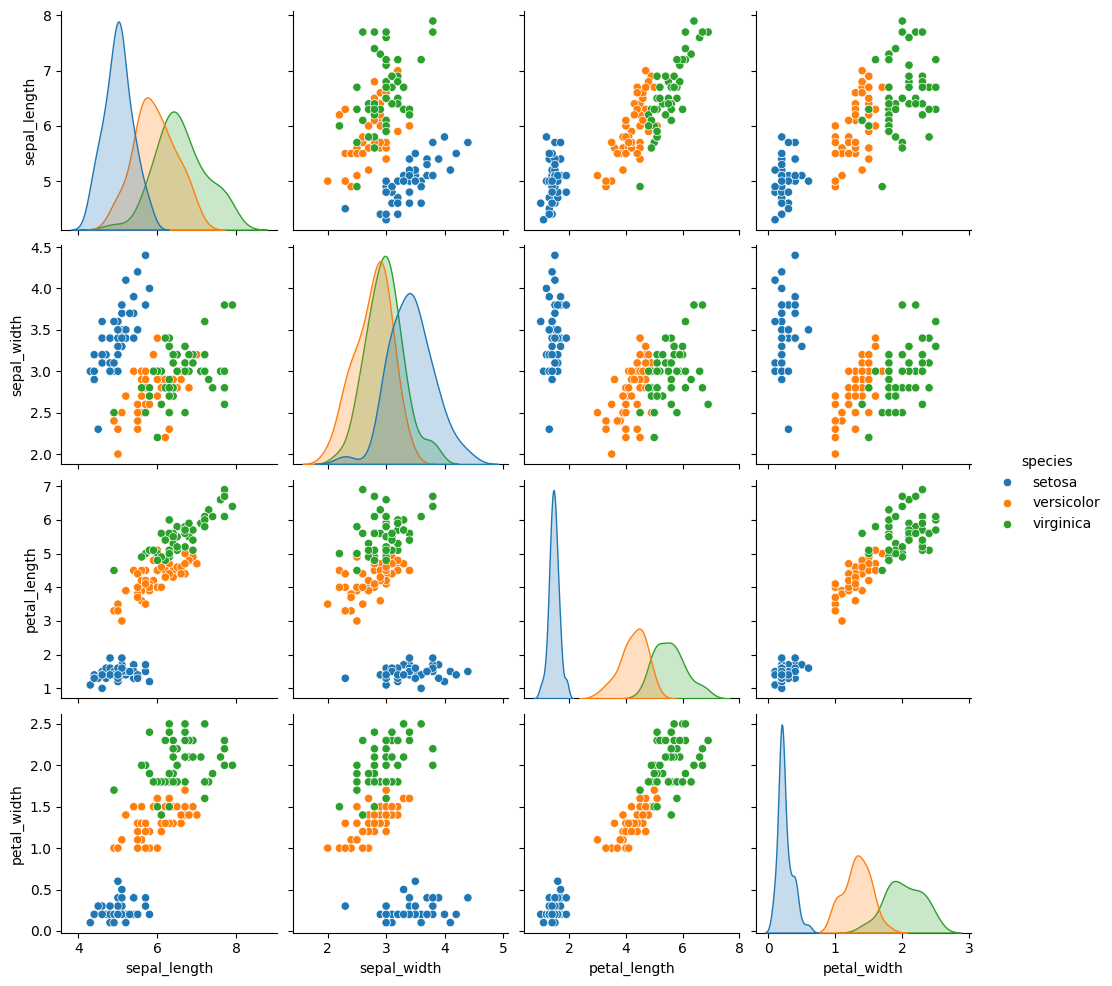

In [30]:
# create a pairplot of the iris dataset
# color the points based on species to see clustering
sns.pairplot(iris, hue="species")

## **8. Lineplot (Numerical - Numerical)**

In [31]:
# group the flights dataset by year and calculate total passengers each year
# reset the index to turn 'year' back into a column
flights_year_wise = flights.groupby("year").sum(numeric_only=True).reset_index()

# display the resulting DataFrame
flights_year_wise

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

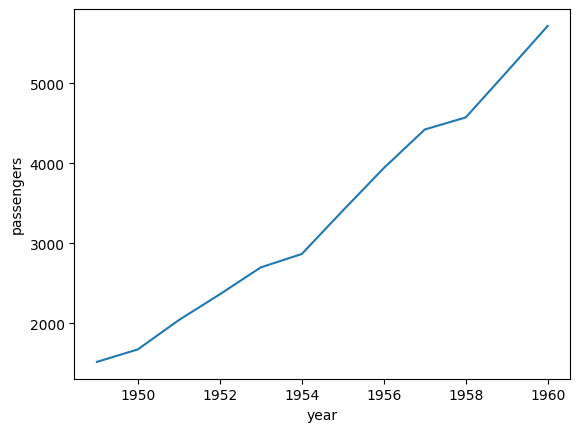

In [32]:
# create a line plot showing total passengers each year
sns.lineplot(flights_year_wise, x="year", y="passengers")